Chuck-a-Luck is a game of chance often associated with charity fundraisers or street gambling rather than casinos.

To play, the House says, Pay 1, pick a number and roll 3 dice. If any of those dice come up, you'll win 1, 2, or 3 dollars".

- "It's even odds", they say, "because the probability of rolling your number is 1/6 and you get to roll 3 dice! 1/6 + 1/6 + 1/6 is 3/6 which is 1/2".
- You know better than this, so it's time to make an experiment to approximate the actual risk and payoff...

Rules:

The player pays $1 to play and picks a number.

The House rolls 3 dice at once.

Payouts:

- \$3 if all three dice match the chosen number
- \$2 if exactly two dice match the chosen number
- \$1 is exactly one of the dice matches the chosen number
- If none of the dice match the player's chosen number, then the House keeps the $1.

Exercises:

What are your chances of getting an outcome payout of 2? (where we earned 3 on the 1 ante)

What are your chances of getting an payout of 1?

What are your chances of getting a payout of 0 where you ante 1 and win 1?

What are your chances of getting a payout of -1 where you ante up, but don't win anything?

What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

Chart out a histogram of all the outcomes of those 1,000,000 games

Is this really a fair game of 1/6 + 1/6 + 1/6 odds?

If you play 1,000,000 games in a row, what are your winnings/losses?

In [10]:
chance_lose = (5/6) * (5/6) * (5/6)
chance_1 = ((1/6) * (5/6) * (5/6)) * 3
chance_2 = ((1/6) * (1/6) * (5/6)) * 3
chance_3 = (1/6) * (1/6) * (1/6)
print(f'theoretical chance of losing is: {chance_lose}')
print(f'theoretical chance of winning 1 roll is: {chance_1}')
print(f'theoretical chance of winning 2 rolls is: {chance_2}')
print(f'theoretical chance of winning 3 rolls is: {chance_3}')
print(f'total probability is: {chance_lose + chance_1 + chance_2 + chance_3}')

theoretical chance of losing is: 0.5787037037037038
theoretical chance of winning 1 roll is: 0.34722222222222227
theoretical chance of winning 2 rolls is: 0.06944444444444445
theoretical chance of winning 3 rolls is: 0.004629629629629629
total probability is: 1.0


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
expected_value = round((chance_lose * -1) + (chance_1 * 0)
                       + (chance_2 * 1) + (chance_3 * 2), 2)
print(f'the theoretical expected value of the game is: ${expected_value}')

the theoretical expected value of the game is: $-0.5


In [49]:
# What are your chances of getting an outcome 
# payout of $2? (where we earned 3 on the 1 ante)
n_trials = n_rows = 10_000
n_rolls = n_cols = 3

# 5/6 outcomes are fails = 0, 1/6 outcomes are success = 1
rolls = np.random.choice([0,1], size = (n_rows, n_cols), p = [(5/6), (1/6)])
win_3_rolls = (pd.DataFrame(rolls).sum(axis=1) == 3).mean()
print(f'observed chance of getting $2 payout is: {win_3_rolls}')

observed chance of getting $2 payout is: 0.0043


In [50]:
#What are your chances of getting an payout of $1 (win 2)?
n_trials = n_rows = 10_000
n_rolls = n_cols = 3

# 5/6 outcomes are fails = 0, 1/6 outcomes are success = 1
rolls = np.random.choice([0,1], size = (n_rows, n_cols), p = [(5/6), (1/6)])
win_2_rolls = (pd.DataFrame(rolls).sum(axis=1) == 2).mean()
print(f'observed chance of getting $1 payout is: {win_2_rolls}')

observed chance of getting $1 payout is: 0.0666


In [51]:
#What are your chances of getting a payout of 0 where you ante 1 and win 1 (win_1_roll)?
n_trials = n_rows = 10_000
n_rolls = n_cols = 3

# 5/6 outcomes are fails = 0, 1/6 outcomes are success = 1
rolls = np.random.choice([0,1], size = (n_rows, n_cols), p = [(5/6), (1/6)])
win_1_rolls = (pd.DataFrame(rolls).sum(axis=1) == 1).mean()
print(f'observed chance of getting $1 payout is: {win_1_rolls}')

observed chance of getting $1 payout is: 0.3483


In [52]:
#What are your chances of getting a payout of -1 
# where you ante up, but don't win anything? (lose_rolls)
n_trials = n_rows = 10_000
n_rolls = n_cols = 3

# 5/6 outcomes are fails = 0, 1/6 outcomes are success = 1
rolls = np.random.choice([0,1], size = (n_rows, n_cols), p = [(5/6), (1/6)])
win_0_rolls = (pd.DataFrame(rolls).sum(axis=1) == 0).mean()
print(f'observed chance of getting $1 payout is: {win_0_rolls}')

observed chance of getting $1 payout is: 0.5775


In [55]:
#What is the average cost/gain per game? 
#(think of averaging the total payout calculation across all simulations)
n_trials = n_rows = 10_000
n_rolls = n_cols = 3

# 5/6 outcomes are fails = 0, 1/6 outcomes are success = 1
rolls = np.random.choice([0,1], size = (n_rows, n_cols), p = [(5/6), (1/6)])
payouts = pd.DataFrame(rolls).apply(lambda row: sum(row) - 1, axis=1)
observed_avg_payout = payouts.mean()
print(f'observed average payout is: ${observed_avg_payout}')

observed average payout is: $-0.5027


In [27]:
# If you play 1,000,000 games in a row, what are your winnings/losses?
n_trials = n_rows = 1_000_000
n_rolls = n_cols = 3

# 5/6 outcomes are fails = 0, 1/6 outcomes are success = 1
rolls = np.random.choice([0,1], size = (n_rows, n_cols), p = [(5/6), (1/6)])
payouts = pd.DataFrame(rolls).apply(lambda row: sum(row) - 1, axis=1)
total_payout = payout.sum()
print(f'after 1_000_000 games you can expect to make: ${total_payout}')

after 1_000_000 games you can expect to make: $-500146


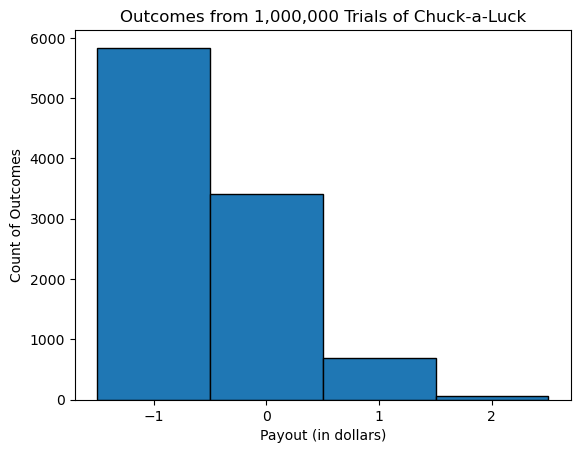

In [56]:
plt.hist(payouts, bins=[-1,0,1,2,3], align='left', edgecolor='black')
plt.xticks([-1,0,1,2])
plt.title('Outcomes from 1,000,000 Trials of Chuck-a-Luck')
plt.xlabel('Payout (in dollars)')
plt.ylabel('Count of Outcomes')
plt.show();

Is this really a fair game of 1/6 + 1/6 + 1/6 odds? 
### Definitely not fair